# <div class="alert alert-block alert-info"> Using Artificial Neural Network for Mental Health </div>

### Synopsis

The dataset "MentalHealthSurvey" is a survey conducted from 2014 that contains responses towards mental health and its effect in the tech industry. This dataset was obtained from Kaggle.com. There are roughly 27 columns and 1250 rows. For our project, we wanted to work on two hypotheses: 
1. Based on survey responses, has the given subject sought treatment in the past?
2. Based on survey responses, if the subject has a health condition, does he feel that it interferes with his/her work?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf #!pip install if don't have
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import scipy.io as scio
from collections import Counter
import seaborn as sns

In [2]:
data = pd.read_csv("mentalhealthsurvey.csv")

In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
print (data.shape)

(1259, 27)


### Variable Descriptions

**Timestamp**

**Age**

**Gender**

**Country**

**state:** If you live in the United States, which state or territory do you live in?

**self_employed:** Are you self-employed?

**family_history:** Do you have a family history of mental illness?

**treatment:** Have you sought treatment for a mental health condition?

**work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?

**no_employees:** How many employees does your company or organization have?

**remote_work:** Do you work remotely (outside of an office) at least 50% of the time?

**tech_company:** Is your employer primarily a tech company/organization?

**benefits:** Does your employer provide mental health benefits?

**care_options:** Do you know the options for mental health care your employer provides?

**wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?

**seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?

**anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

**leave:** How easy is it for you to take medical leave for a mental health condition?

**mentalhealthconsequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?

**physhealthconsequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?

**coworkers:** Would you be willing to discuss a mental health issue with your coworkers?

**supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?

**mentalhealthinterview:** Would you bring up a mental health issue with a potential employer in an interview?

**physhealthinterview:** Would you bring up a physical health issue with a potential employer in an interview?

**mentalvsphysical:** Do you feel that your employer takes mental health as seriously as physical health?

**obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

**comments:** Any additional notes or comments

# Data Visualization

To get a better understanding of the data, we visualized few variables. These variables are chosen based on uniqueness, frequency and other factors that pertained to mental health. We will use the information gathered from these visuals/graphs to chose the variables when training our model.

## Responses by Country

Most of the responses of the survey were from the USA. Mental health can be defined and is measured differently in various countries due to cultural and industrial differences. About 60% of the responses were from respondents working in the US. Hence, we will focus most on an analysis of survey responses in the US.

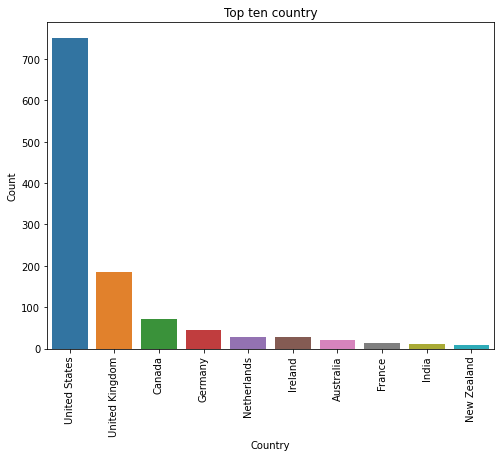

In [5]:
country_count = Counter(data['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

##  State

To further explore the responses, we looked at where the responses were coming from based on the states. It makes sense that most responses are from California as a the tech sector is the largest in California. As we can be seen that US contributed the most with 750 respondents and California contributed with 138 respndents.

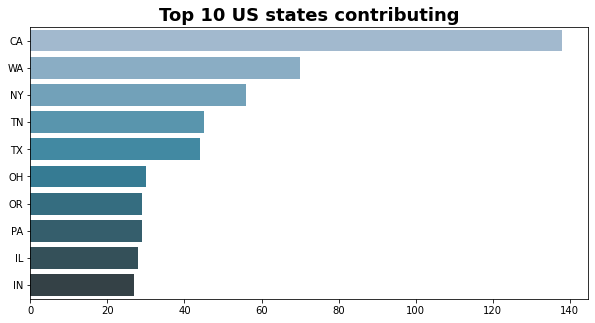

In [6]:
usa = data.loc[data['Country'] == 'United States']
top_10_statesUS = usa['state'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_statesUS['state'],top_10_statesUS.index,palette="PuBuGn_d")
plt.title('Top 10 US states contributing',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

## Employer and Resources

Next, we created a few charts to see which variables might be useful in determining our dependent variable. We wanted to make sure there is a good enough variability of the responses that could be used to train and test our data. The pie charts listed below are all related to work factors that may contribute to mental health status.

#### Workplace and Mental Health:
<ul>
<li>Does Employer provide mental health benefits?</li>
<li>Does mental health affect work?</li>
<li>Does remote work contribute to mental health?</li>
<li>Are you willing to discuss mental health with coworkers?</li>
<li>Are you willing to discuss mental health with supervisors?</li>
</ul>

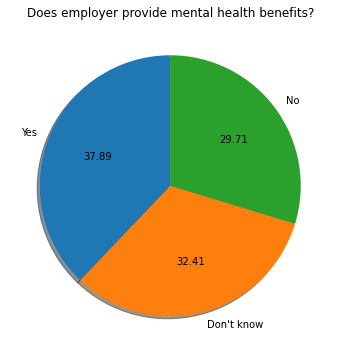

In [7]:
plt.figure(figsize = (10,6))
value = data['benefits'].value_counts()
plt.pie(value, autopct = '%0.02f', labels = ['Yes', 'Don\'t know', 'No'], startangle = 90, shadow = True)
plt.title('Does employer provide mental health benefits?')
plt.show()

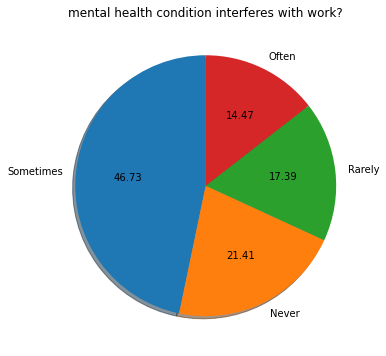

In [8]:
plt.figure(figsize = (10,6))
v = data['work_interfere'].value_counts()
label = ['Sometimes', 'Never', 'Rarely', 'Often']
plt.pie(v, labels = label, autopct = '%0.02f', radius = 1,shadow= True, startangle = 90)
plt.title('mental health condition interferes with work?')
plt.show()

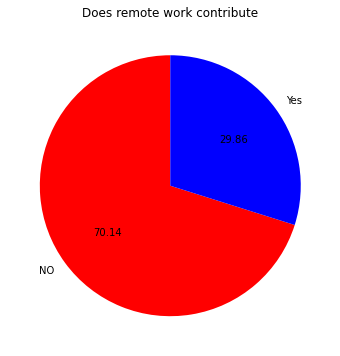

In [9]:
plt.figure(figsize = (10,6))
v = data['remote_work'].value_counts()
plt.pie(v, autopct = '%0.02f', colors = ['r', 'b'], startangle = 90, labels= ['NO', 'Yes'])
plt.title('Does remote work contribute')
plt.show()

It says mostly about sometimes which is like 47% of the majority. The surveyed people agree that their mental health somewhat 
affects their productivity at work. It is interesting to find that people face mental trauma and they cantofcourse separate 
that from their professional life like all the time. Remote work contributes to about 30%. People who are not more prone to 
work at home are usually bored and filled with anxiety leading to degradation in mental health.

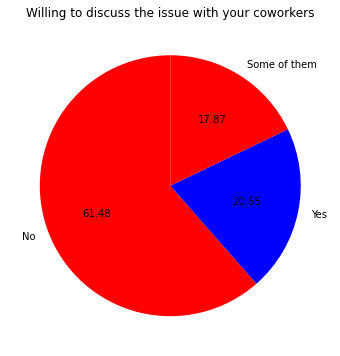

In [10]:
plt.figure(figsize = (10,6))
v = data['coworkers'].value_counts()
plt.pie(v, autopct = '%0.02f', colors = ['r', 'b'], startangle = 90, labels= ['No', 'Yes','Some of them'])
plt.title('Willing to discuss the issue with your coworkers')
plt.show()

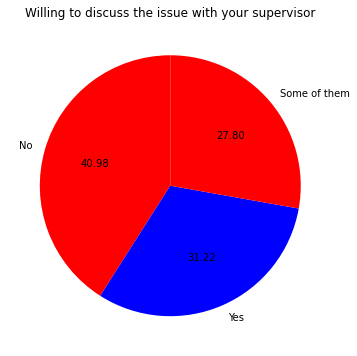

In [11]:
plt.figure(figsize = (10,6))
v = data['supervisor'].value_counts()
plt.pie(v, autopct = '%0.02f', colors = ['r', 'b'], startangle = 90, labels= ['No', 'Yes','Some of them'])
plt.title('Willing to discuss the issue with your supervisor')
plt.show()

21% of ppl are willing to discuss their issues with coworkers. People feel that sharing about their mental 
or physical health with employers would help them a bit but they are reluctant to share the same with their
coworkers.They would prefer to share with only some of the coworkers. 31% of them feel ok to share it with
supervisor keeping in mind that they might get some benefit or help from that.

## Family History and Treatment

The graph below displays whether family history can affect a person seeking treatment. Genetics can be one of the main determinants that cause mental issues. As we mentioned in our objective, treatment will be one of our variables of interest.

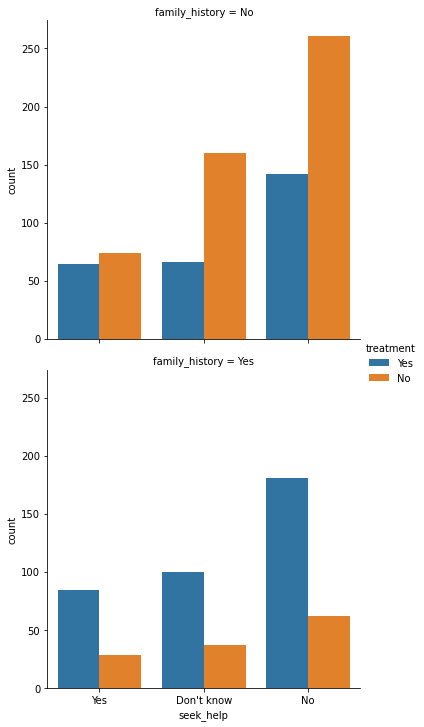

In [12]:
sns.catplot(x='seek_help', hue='treatment', row='family_history', kind='count', data=data, orient = 'horizontal')

# Data Cleaning

To train our neural network model, we wanted to make the values binary. Our dataset initially had a True/False and str values that we will convert to binary. There were also a lot of null values, specifically within the state, work_interfere, and comments columns. We will first drop the comments column as it will have too many unique values and not useful in training our data. For the rest of the columns that contain NA values, we will fill in those NA values with the responses with the **mode**.

In [13]:
#check for missing values
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [14]:
data = data.drop('comments',axis=1)

In [15]:
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [16]:
data['self_employed'].mode()

0    No
dtype: object

In [17]:
data['self_employed']=data['self_employed'].fillna('No')

In [18]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [19]:
data['work_interfere'].mode()

0    Sometimes
dtype: object

In [20]:
data['work_interfere']=data['work_interfere'].fillna('Sometimes')

In [21]:
#data.timestamp convert to yr mnth day ? Dropping for now
data = data.drop('Timestamp',axis=1)

In [22]:
data.nunique()

Age                          53
Gender                       49
Country                      48
state                        45
self_employed                 2
family_history                2
treatment                     2
work_interfere                4
no_employees                  6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
dtype: int64

The Column Gender has a lot of unique values. Let's keep it simple by only defining female as 0, male as 1 and other gender responses as 2.

In [23]:
{column: list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Gender': ['Female',
  'M',
  'Male',
  'male',
  'female',
  'm',
  'Male-ish',
  'maile',
  'Trans-female',
  'Cis Female',
  'F',
  'something kinda male?',
  'Cis Male',
  'Woman',
  'f',
  'Mal',
  'Male (CIS)',
  'queer/she/they',
  'non-binary',
  'Femake',
  'woman',
  'Make',
  'Nah',
  'All',
  'Enby',
  'fluid',
  'Genderqueer',
  'Female ',
  'Androgyne',
  'Agender',
  'cis-female/femme',
  'Guy (-ish) ^_^',
  'male leaning androgynous',
  'Male ',
  'Man',
  'Trans woman',
  'msle',
  'Neuter',
  'Female (trans)',
  'queer',
  'Female (cis)',
  'Mail',
  'cis male',
  'A little about you',
  'Malr',
  'p',
  'femail',
  'Cis Man',
  'ostensibly male, unsure what that really means'],
 'Country': ['United States',
  'Canada',
  'United Kingdom',
  'Bulgaria',
  'France',
  'Portugal',
  'Netherlands',
  'Switzerland',
  'Poland',
  'Australia',
  'Germany',
  'Russia',
  'Mexico',
  'Brazil',
  'Slovenia',
  'Costa Rica',
  'Austria',
  'Ireland',
  'India',
  'South Afric

In [24]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [25]:
data['Gender'] = data['Gender'].apply(encode_gender)

#### Next, we are left with binary columns (yes/no), columns with string data and columns where there are multiple answer options (Yes/No/Maybe or Yes/No/Some of them etc). We will perform a clean up on these columns.

Our target variable for hypothesis 1 is treatment. 

In [26]:
target = 'treatment'

binary_features = [
    'self_employed',
    'family_history',
    'remote_work',
    'tech_company',
    'obs_consequence'
]

ordinal_features = [
    'work_interfere',
    'no_employees'
]

nominal_features = [
    'Country',
    'state',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical'
]

In [27]:
#Defining a function to convert binary_features to 0 and 1
def binary_encode(df, cols, pos_values):
    df = df.copy()
    for col, pos_value in zip(cols, pos_values):
        df[col] = df[col].apply(lambda x: 1 if x == pos_value else 0)
    return df

In [28]:
#Defining a function to convert ordinal_features to 0-3 and 0-5 based on the recorded responses
def ordinal_encode(df, cols, orderings):
    df = df.copy()
    for col, ordering in zip(cols, orderings):
        df[col] = df[col].apply(lambda x: ordering.index(x))
    return df

In [29]:
#Defining a function to converting nominal_features to dummy columns
def nominal_encode(df, cols, prefixes):
    df = df.copy()
    for col, prefix in zip(cols, prefixes):
        dummies = pd.get_dummies(df[col], prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(col, axis=1)
    return df

In [30]:
binary_pos_values = ['Yes' for feature in binary_features]

In [31]:
ordinal_orderings = [
    ['Never', 'Rarely', 'Sometimes', 'Often'],
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
]

In [32]:
nominal_prefixes = [
    'co',
    'st',
    're',
    'be',
    'ca',
    'we',
    'se',
    'an',
    'le',
    'mc',
    'ph',
    'cw',
    'su',
    'mi',
    'pi',
    'mp'
]

In [33]:
data = binary_encode(
    data,
    cols=binary_features,
    pos_values=binary_pos_values
)

In [34]:
data = ordinal_encode(
    data,
    cols=ordinal_features,
    orderings=ordinal_orderings
)

In [35]:
data = nominal_encode(
    data,
    cols=nominal_features,
    prefixes=nominal_prefixes
)


In [36]:
data = binary_encode(data, cols=['treatment'], pos_values=['Yes'])

In [37]:
print("Remaining non-numeric columns:", len(data.select_dtypes('object').columns))

Remaining non-numeric columns: 0


In [38]:
print("Remaining missing values:", data.isna().sum().sum())

Remaining missing values: 0


In [39]:
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,...,cw_Yes,su_Maybe,su_No,su_Yes,mi_Maybe,mi_No,mi_Yes,pi_Don't know,pi_No,pi_Yes
0,37,0,0,0,1,3,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,44,1,0,0,0,1,5,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,32,1,0,0,0,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
3,31,1,0,1,1,3,2,0,1,1,...,0,1,0,0,1,0,0,0,1,0
4,31,1,0,0,0,0,3,1,1,0,...,1,0,0,1,0,0,1,1,0,0


# Building our ANN Model

**HYPOTHESIS 1:** Based on survey responses, has the given subject sought treatment in the past?

* 1 if subject have seeked treatment
* 0 if subject did not seek treatment

This hypothesis is significant because being able to predict those that are most likely to seek treatment can present several advantages to tech companies. First, these companies are able to budget for certain mental health benefits for employees and second, they can target the right employees when offering resources and information on mental health thus improving company efficiency. 

We will use 'treatment' as our dependent variable when building our ANN model. The data is split 70/30 train & test.  Since our explanatory variables are now all binary and in matrix, the neural network can recognize the inputs. Next we will split the model into 3 different sets:
* training set: train model
* validation set: check overfitting of model
* testing set: see how well model does overall

In [39]:
y = data['treatment'].copy()
X = data.drop('treatment', axis=1).copy()

In [40]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

## Model Description

To build our Neural Network, we used the Keras model. This model takes an input of 1024 nodes. For this model, we use the <font color=red>relu</font> activation function. 
Since this is a classification model, where we want to see if the survey respondent seeked treatment or not, the ouput will be 1 or 0. The ouput will use the <font color=blue>Sigmoid</font> activation function.

Next, we will compile the model using the **"adam"** optimizer. By compiling our model we can use the loss function "binary_crossentropy". Lastly we can  analyze our algorithm training by using metrics.

After we have put in all information, we can fit the data by defining a new variable **"history"**. We use epochs = 50 as how many times we want to repeat the training.




### Results

Through looking at the training trials, we can see the results are pretty consistent. By the end of training, loss very low is or almost equal to zero. 

Similarly, the accuracy is more or less perfect.

Validation loss is at around 1.8. We would like to reduce this but is still pretty low.

This means our model has a good feel for the data for testing.

In [42]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2, #validation set
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
11/11 [==============================] - 2s 92ms/step - loss: 0.7048 - accuracy: 0.5790 - auc: 0.5854 - val_loss: 0.6338 - val_accuracy: 0.6836 - val_auc: 0.7738
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.4461 - accuracy: 0.7830 - auc: 0.8788 - val_loss: 0.6888 - val_accuracy: 0.7062 - val_auc: 0.7595
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3584 - accuracy: 0.8413 - auc: 0.9244 - val_loss: 0.7482 - val_accuracy: 0.6893 - val_auc: 0.7422
Epoch 4/50
11/11 [==============================] - 0s 8ms/step - loss: 0.2656 - accuracy: 0.9065 - auc: 0.9666 - val_loss: 0.7690 - val_accuracy: 0.7288 - val_auc: 0.7559
Epoch 5/50
11/11 [==============================] - 0s 8ms/step - loss: 0.1858 - accuracy: 0.9472 - auc: 0.9901 - val_loss: 0.8732 - val_accuracy: 0.6949 - val_auc: 0.7344
Epoch 6/50
11/11 [==============================] - 0s 8ms/step - loss: 0.1437 - accuracy: 0.9696 - auc: 0.9934 - val_loss: 0.9776 - val_ac

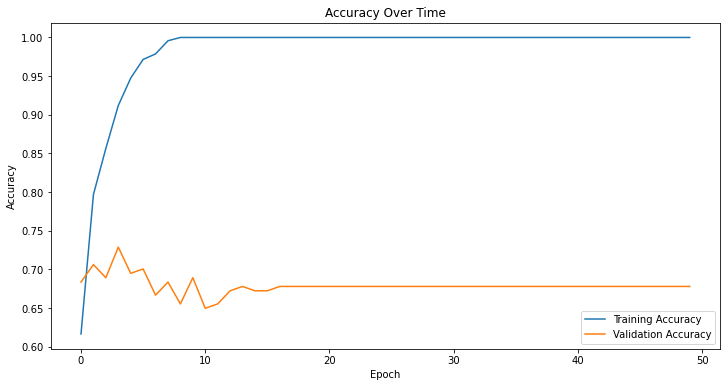

In [43]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

For Closure, here are the results for our testing set. The loss is kept low at 1.4469. The AUC score is .7515, meaning the model did a pretty good job at predicting True Positive results for our variable of interest.

In [44]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 1.3783 - accuracy: 0.6931 - auc: 0.7483


[1.3782597780227661, 0.6931216716766357, 0.7483192086219788]

### Alternative Model Comparisons for Hypothesis 1 

In Machine Learning, the theorem of "No Free Lunch" is a common conception where almost always no model will be the best for any problem. In our case, after building our Neural Network model, it is a good idea to compare it to other models. This way we can gauge how well our data overall can be used for prediction. In our alternative models, we used a K-Means, Random Forest and Decicion Tree Classifier. Below are the results. 

Models:

**KNearestNeighbors**

* Training Accuracy:  0.694
* Test Accuracy:  0.616

**RandomForest**
* RandomForest Training Accuracy:  0.780 
* Test Accuracy:  0.688

**Decition Tree Classifier**
* Training Accuracy:  0.545
* Test Accuracy:  0.432

**Keras**
* Test Accuracy: 6746


Based on the alternative models, the RandomForest model did perform slightly better on the testing set. One advantage to the Neural Network model is it is highly customizable. In our project, we made many adjustments to determine how many nodes to use in order to build the model. Also, we did add hidden nodes, but removed them in the end as hidden nodes require more computing power and reduced our train/test scores. Overall, the Neural Network performed well for our dataset.

In [45]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
kf = KFold(n_splits=10)
kf.get_n_splits(X)
ypredicted=[]
list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier = KNeighborsClassifier(6)
    classifier.fit(X_train, y_train)
    ypredicted1 = classifier.predict(X_test)
    ypredicted.extend(ypredicted1)
    list.extend(y_test)
print("F1-score: ", f1_score(list,ypredicted, average="macro"))

F1-score:  0.5549796721651087


In [46]:
from sklearn.metrics import accuracy_score
list_accuracy=[]
for i in range(3,12,1):
    Classifier = KNeighborsClassifier(i, algorithm="brute")
    Classifier.fit(X_train, y_train)
    ypredicted = Classifier.predict(X_test)
    result = accuracy_score(y_test, ypredicted)
    list_accuracy.append(result)

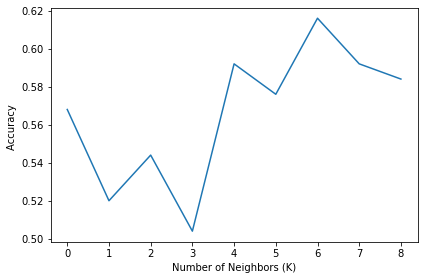

In [47]:
plt.plot(list_accuracy)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout() 
plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
kf = KFold(n_splits=10)
kf.get_n_splits(X)
ypredicted=[]
list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier =DecisionTreeClassifier(criterion="entropy")
    classifier.fit(X_train, y_train)
    ypredicted1 = classifier.predict(X_test)
    ypredicted.extend(ypredicted1)
    list.extend(y_test)
print("F1-score: ", f1_score(list,ypredicted, average="macro"))

F1-score:  0.6830018155073482


In [49]:
from sklearn.ensemble import RandomForestClassifier
kf = KFold(n_splits=10)
kf.get_n_splits(X)
ypredicted=[]
list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier =RandomForestClassifier(class_weight= {0: 1, 1: 1}, criterion= 'entropy'
                             , max_depth= 5, 
                             max_features=3,
                             max_leaf_nodes= 8, 
                             min_impurity_decrease= 0.02, 
                             min_samples_split= 2,
                             n_estimators=100)
    classifier.fit(X_train, y_train)
    ypredicted1 = classifier.predict(X_test)
    ypredicted.extend(ypredicted1)
    list.extend(y_test)
print("F1-score: ", f1_score(list,ypredicted, average="macro"))

F1-score:  0.6204928861255858


In [50]:
kf = KFold(n_splits=10)
kf.get_n_splits(X)
ypredicted=[]
list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    classifier =RandomForestClassifier(class_weight= {0: 1, 1: 1}, criterion= 'entropy'
                             , max_depth= 5, 
                             max_features=3,
                             max_leaf_nodes= 8, 
                             min_impurity_decrease= 0.02, 
                             min_samples_split= 2,
                             n_estimators=100)
    classifier.fit(X_train, y_train)
    ypredicted1 = classifier.predict(X_test)
    ypredicted.extend(ypredicted1)
    list.extend(y_test)
print("F1-score: ", f1_score(list,ypredicted, average="macro"))

F1-score:  0.6317655968453764


In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
    
print("Training Accuracy: ",knn.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  0.6940035273368607
Test Accuracy:  0.616


In [52]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
forest.fit(X_train, y_train)
    
y_pred_class = forest.predict(X_test)

print("Training Accuracy: ",forest.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  0.7795414462081128
Test Accuracy:  0.688


In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
tree.fit(X_train, y_train)

y_pred_class = tree.predict(X_test)

print("Training Accuracy: ",tree.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  0.5502645502645502
Test Accuracy:  0.44


# ANN Model 2

**HYPOTHESIS 2:** Based on survey responses, if the subject has a health condition, does he feel that it interferes with his/her work?
For subjects with a health condition:
* 1 if subject feels it interferece with work
* 0 if subject feels does not interfere with work

This hypothesis is significant because being able to predict those for whom mental illness is likely to be an intereference gives the tech companies the chance to prevent that and thus, assist their employees in being more productive. This could mean providing the right accomodations sooner rather than later.

*Note:* We'll use the same steps as Hypothesis 1 to build our model. The only difference is we will change our dependent variable for prediction

In [54]:
#If there is no interference in work then 0 else 1
data.work_interfere>0

0        True
1        True
2        True
3        True
4       False
        ...  
1254     True
1255     True
1256     True
1257     True
1258     True
Name: work_interfere, Length: 1259, dtype: bool

In [55]:
data.work_interfere[data.work_interfere>0]=1

In [56]:
y = data['work_interfere'].copy()
X = data.drop('work_interfere', axis=1).copy()

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [59]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
11/11 [==============================] - 1s 28ms/step - loss: 0.5154 - accuracy: 0.8139 - auc: 0.5832 - val_loss: 0.4588 - val_accuracy: 0.8136 - val_auc: 0.6260
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.3214 - accuracy: 0.8722 - auc: 0.8734 - val_loss: 0.4696 - val_accuracy: 0.8023 - val_auc: 0.6638
Epoch 3/50
11/11 [==============================] - 0s 8ms/step - loss: 0.2617 - accuracy: 0.9015 - auc: 0.9266 - val_loss: 0.5618 - val_accuracy: 0.7966 - val_auc: 0.6406
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.1847 - accuracy: 0.9353 - auc: 0.9697 - val_loss: 0.6711 - val_accuracy: 0.8136 - val_auc: 0.6381
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.1219 - accuracy: 0.9549 - auc: 0.9916 - val_loss: 0.7462 - val_accuracy: 0.7684 - val_auc: 0.6191
Epoch 6/50
11/11 [==============================] - 0s 7ms/step - loss: 0.1079 - accuracy: 0.9742 - auc: 0.9936 - val_loss: 0.8425 - val_ac

### Hypothesis 2 Model Train and Test Results

Similarly to hypothesis 1, the results were quite consistent. We had a small loss (close to zero) with perfect or near perfect accuracy. In this model, as compared to model 1, the validation loss is smaller.

However, when we test this model using our testing set, the accuracy was higher but AUC score is lower than model 1. For our data, the proportion of true positive and true negatives are higher, but there is a recall tradeoff. 

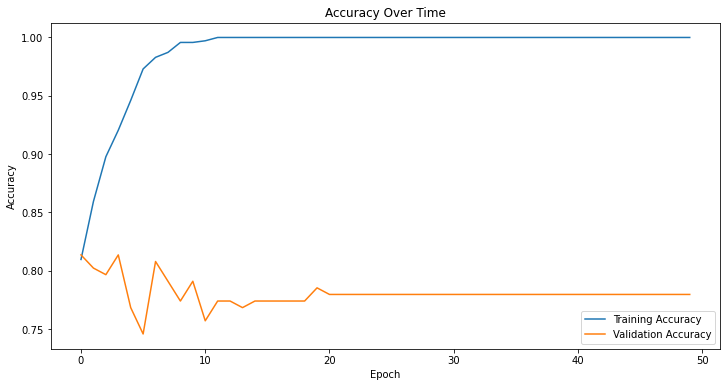

In [60]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label="Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.title("Accuracy Over Time")

plt.show()

In [61]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 997us/step - loss: 1.2176 - accuracy: 0.8016 - auc: 0.6358


[1.2175520658493042, 0.8015872836112976, 0.6358017921447754]

## Conclusion
Ultimately, our two hypothesis were able predict employees that will most likely seek treatment and those for whom mental illness is likely to become an interference. The first hypothese predicts with a validation accuracy of 66% and the second, with a validation accuracy of 79%. While there is room for improvement, our models can make significant strides in translating to actionable recommendations for employers. These models can successfully predict our two hypotheses. 

The ANN model proves sufficient in modeling our mental health data, however, it seems to experience some level of overfitting, indicated by the difference between our training and validation accuracy in both models. A recommendation for future studies would be to address this further, maybe in ways that are outside of the scope of this study.